In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
file_path = r'C:\work\Book1.xlsx'
df_patent = pd.read_excel(file_path)

In [89]:
df_patent.rename(columns={df_patent.columns[0]: 'Country'}, inplace=True)
df_patent.drop(df_patent.columns[[1, 2, 3]], axis=1, inplace=True)
indices_to_drop = [0, 1, 2, 3, 11, 36, 37, 39, 41, 43, 45, 47, 48, 59, 60, 61, 67, 94, 109, 120, 123, 129, 145, 155, 156, 175, 181, 183, 184]
df_patent.drop(indices_to_drop, inplace=True)

rows_to_change = [23, 80, 93, 116, 121, 136, 162, 168, 179]
column_to_change = 'Country'
new_names = ['Bolivia', 'Iran', 'Lao Peoples Democratic Republic', 'Netherlands', 'Macedonia', 'Moldova', 'Syria', 'Turkey', 'Venezuela']

for i, row_index in enumerate(rows_to_change):
    if row_index < 187:
        df_patent.at[row_index, column_to_change] = new_names[i]

df_patent = df_patent.sort_values(by='Country')

df_patent.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,8.0,5.0,5.0,9.0,21.0,34.0,62.0,120.0,238.0,391.0,416.0,386.0,426.0,366.0,378.0,361.0,341.0,11.0,NaN,4.0,13.0,19.0,25.0,24.0,18.0,5.0,12.0,24.0,21.0
5,Algeria,354.0,354.0,334.0,308.0,375.0,258.0,235.0,180.0,206.0,204.0,235.0,176.0,174.0,146.0,145.0,162.0,200.0,241.0,309.0,284.0,159.0,145.0,334.0,326.0,392.0,524.0,669.0,849.0,NaN,NaN,806.0,897.0,900.0,840.0,813.0,805.0,672.0,743.0,673.0,638.0,710.0,849.0,1118.0
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11.0,15.0,8.0,11.0,8.0
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,110.0,85.0,86.0,80.0
8,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,7.0,15.0,10.0,12.0,8.0,10.0,NaN,3.0,8.0,6.0


In [90]:
GDP_path = r'C:\work\imf-dm-export-20231128.xls'
df_GDP = pd.read_excel(GDP_path)

In [91]:
df_GDP.rename(columns={df_GDP.columns[0]: 'Country'}, inplace=True)
indices_to_drop = [0, 1, 9, 20, 32, 34, 35, 39, 40, 41, 46, 54, 55, 62, 70, 71, 75, 92, 103, 107, 110, 111, 114, 120, 122, 127, 133, 141, 152, 161, 162, 166, 170, 171, 173, 175, 176, 190, 193, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230]
df_GDP.drop(indices_to_drop, inplace=True)
df_GDP = df_GDP.iloc[:, :-6]

rows_to_change = [13, 37, 63, 91, 94, 95, 129, 157, 182, 187, 192]
column_to_change = 'Country'
new_names = ['Bahamas', 'China', 'Gambia', 'Republic of Korea', 'Kyrgyzstan', 'Lao Peoples Democratic Republic', 'Macedonia', 'Slovakia', 'Turkey', 'United States of America', 'Viet Nam']

for i, row_index in enumerate(rows_to_change):
    if row_index < 200:
        df_GDP.at[row_index, column_to_change] = new_names[i]

df_GDP = df_GDP.sort_values(by='Country')

df_GDP.shape

(158, 44)

In [92]:
df_combined = pd.merge(df_patent, df_GDP, on='Country', how='inner', suffixes=('_patent', '_GDP'))
df_combined.set_index('Country', inplace=True)

df_combined.head()

,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,1990_patent,1991_patent,1992_patent,1993_patent,1994_patent,1995_patent,1996_patent,1997_patent,1998_patent,1999_patent,2000_patent,2001_patent,2002_patent,2003_patent,2004_patent,2005_patent,2006_patent,2007_patent,2008_patent,2009_patent,2010_patent,2011_patent,2012_patent,2013_patent,2014_patent,2015_patent,2016_patent,2017_patent,2018_patent,2019_patent,2020_patent,2021_patent,2022_patent,1980_GDP,1981_GDP,1982_GDP,1983_GDP,1984_GDP,1985_GDP,1986_GDP,1987_GDP,1988_GDP,1989_GDP,1990_GDP,1991_GDP,1992_GDP,1993_GDP,1994_GDP,1995_GDP,1996_GDP,1997_GDP,1998_GDP,1999_GDP,2000_GDP,2001_GDP,2002_GDP,2003_GDP,2004_GDP,2005_GDP,2006_GDP,2007_GDP,2008_GDP,2009_GDP,2010_GDP,2011_GDP,2012_GDP,2013_GDP,2014_GDP,2015_GDP,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2021_GDP,2022_GDP
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,8.0,5.0,5.0,9.0,21.0,34.0,62.0,120.0,238.0,391.0,416.0,386.0,426.0,366.0,378.0,361.0,341.0,11.0,NaN,4.0,13.0,19.0,25.0,24.0,18.0,5.0,12.0,24.0,21.0,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,9.8,-10,-28,-7.2,9.6,9.4,8.9,9.1,-10.9,8.8,12.9,6.9,8.3,4.5,5.5,5.5,5.5,5.9,6,7.5,3.4,3.7,2.5,1.4,1,1.8,2.2,3.3,3.8,4,2.1,-3.3,8.9,4.8
Algeria,354.0,354.0,334.0,308.0,375.0,258.0,235.0,180.0,206.0,204.0,235.0,176.0,174.0,146.0,145.0,162.0,200.0,241.0,309.0,284.0,159.0,145.0,334.0,326.0,392.0,524.0,669.0,849.0,NaN,NaN,806.0,897.0,900.0,840.0,813.0,805.0,672.0,743.0,673.0,638.0,710.0,849.0,1118.0,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,0.8,-1.2,1.6,-2.1,-0.9,3.8,3.8,1.1,5.1,3.2,3.8,3,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.9,3.4,2.8,3.8,3.7,3.2,1.4,1.2,1,-5.1,3.4,3.2
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11.0,15.0,8.0,11.0,8.0,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,8.1,4.5,8.7,8.1,5.4,4.8,1.6,-5.6,-5.3,-2,0,-5,-3.5,2.5,1.4,3.7,0.3,1.6,2,-11.2,8.3,8.8
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,110.0,85.0,86.0,80.0,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,0,-3.5,12.1,11.4,11,10.5,10.4,11.2,7.3,4.7,2.2,3.1,4.2,13.7,3,11,15,11.5,14,11.2,0.9,4.9,3.5,8.5,5,4.8,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.2,3
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,7.0,15.0,10.0,12.0,8.0,10.0,NaN,3.0,8.0,6.0,8.2,3.8,-0.1,5.4,10.2,7.6,11.5,6.6,5.2,5.3,3,2.2,1.2,5.3,6.7,-4.4,6.6,5.5,4.7,3.7,6.2,-4.5,1,6.1,5.8,6.5,12.7,9.3,0,-12,-7.8,-2,3.4,-0.6,3.8,3.8,5.5,3.1,6.8,4.3,-17.5,6.6,8.5


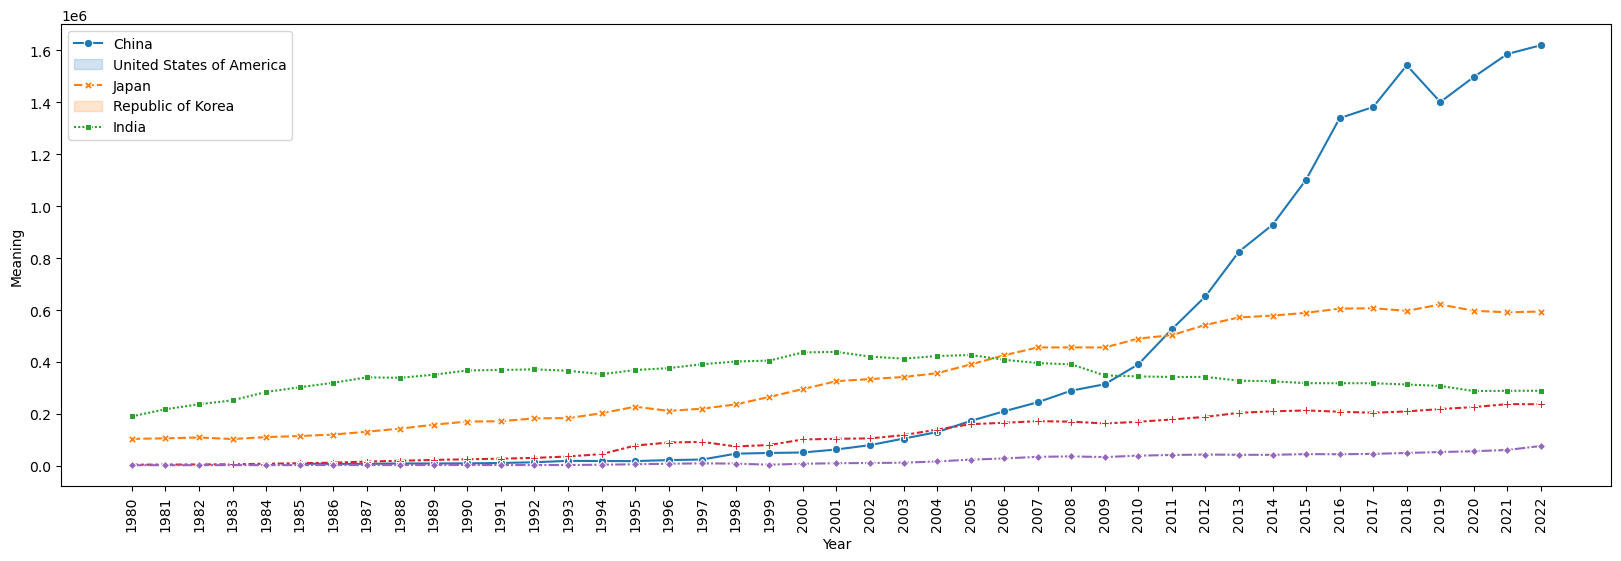

In [93]:
df_combined_transposed = df_combined.transpose()

# Sort the DataFrame based on values in the "2022_patent" column and select the top 5
top_5_countries_2022 = df_combined["2022_patent"].sort_values(ascending=False).head(5).index

# Sort the DataFrame based on the top 5 countries for 2022
df_combined_sorted = df_combined.loc[top_5_countries_2022].sort_values(by="2022_patent", ascending=False)

# Plotting
plt.figure(figsize=(20, 6))

# Plot the DataFrame using Seaborn's lineplot
sns.lineplot(data=df_combined_sorted.transpose()[:43], markers=True)

# Set custom x-axis tick labels from 1980 to 2022
years = list(range(1980, 2023))
plt.xticks(range(len(years)), years, rotation=90)

plt.xlabel('Year')
plt.ylabel('Meaning')

# Add legend for the top 5 countries
plt.legend(top_5_countries_2022)

plt.show()

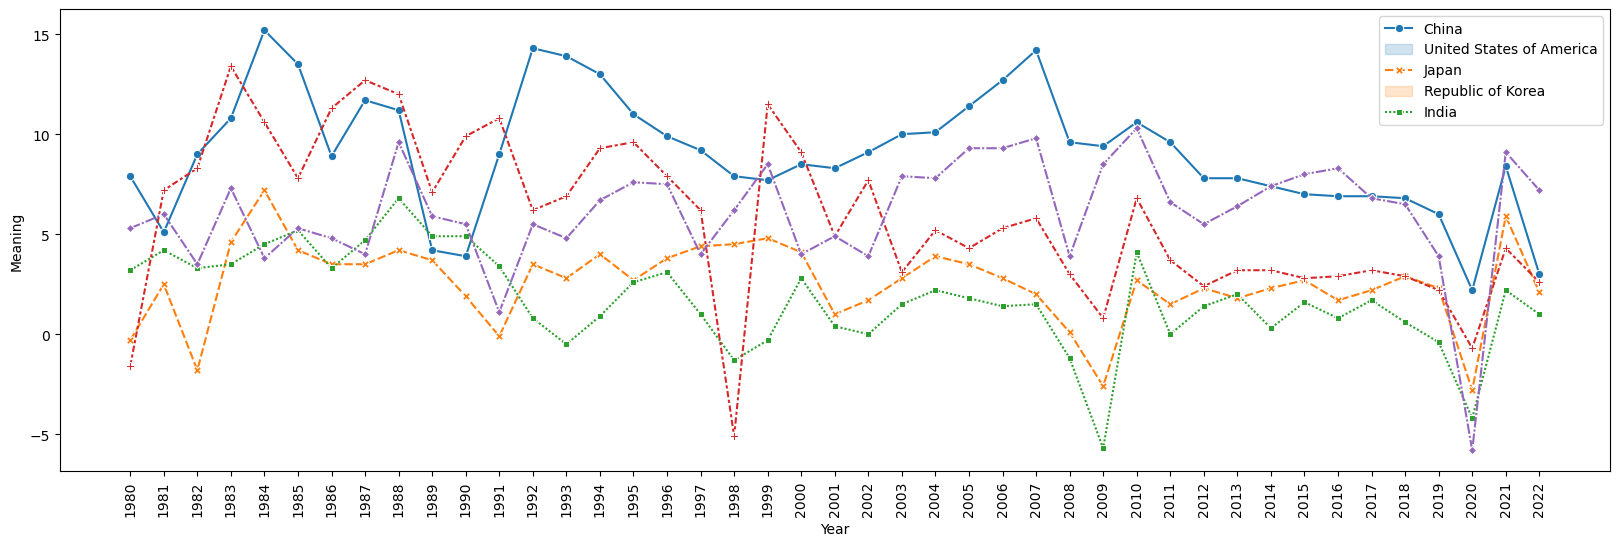

In [94]:
# Sort the DataFrame based on the top 5 countries for 2022
df_combined_sorted_gdp = df_combined.loc[top_5_countries_2022].sort_values(by="2022_patent", ascending=False)

# Plotting
plt.figure(figsize=(20, 6))

# Plot the DataFrame using Seaborn's lineplot
sns.lineplot(data=df_combined_sorted_gdp.transpose()[43:], markers=True)

# Set custom x-axis tick labels from 1980 to 2022
years = list(range(1980, 2023))
plt.xticks(range(len(years)), years, rotation=90)

plt.xlabel('Year')
plt.ylabel('Meaning')

# Add legend for the top 5 countries
plt.legend(top_5_countries_2022)

plt.show()

In [95]:
df_combined.isnull().sum().head()

1980_patent    74
1981_patent    81
1982_patent    83
1983_patent    82
1984_patent    77
dtype: int64

In [96]:
df_top5=df_combined[df_combined['2022_patent']!=0].sort_values(by='2022_patent', ascending=False).head()

In [101]:
df_top5

,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,1990_patent,1991_patent,1992_patent,1993_patent,1994_patent,1995_patent,1996_patent,1997_patent,1998_patent,1999_patent,2000_patent,2001_patent,2002_patent,2003_patent,2004_patent,2005_patent,2006_patent,2007_patent,2008_patent,2009_patent,2010_patent,2011_patent,2012_patent,2013_patent,2014_patent,2015_patent,2016_patent,2017_patent,2018_patent,2019_patent,2020_patent,2021_patent,2022_patent,1980_GDP,1981_GDP,1982_GDP,1983_GDP,1984_GDP,1985_GDP,1986_GDP,1987_GDP,1988_GDP,1989_GDP,1990_GDP,1991_GDP,1992_GDP,1993_GDP,1994_GDP,1995_GDP,1996_GDP,1997_GDP,1998_GDP,1999_GDP,2000_GDP,2001_GDP,2002_GDP,2003_GDP,2004_GDP,2005_GDP,2006_GDP,2007_GDP,2008_GDP,2009_GDP,2010_GDP,2011_GDP,2012_GDP,2013_GDP,2014_GDP,2015_GDP,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2021_GDP,2022_GDP
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,NaN,NaN,NaN,NaN,NaN,8558.0,8009.0,8059.0,9652.0,9659.0,10137.0,11423.0,14409.0,19618.0,19067.0,18699.0,22742.0,24774.0,47396.0,50044.0,51906.0,63450.0,80232.0,105317.0,130384.0,173327.0,210501.0,245161.0,289838.0,314604.0,391177.0,526412.0,652777.0,825136.0,928177.0,1101864.0,1338503.0,1381594.0,1542002.0,1400661.0,1497159.0,1585663.0,1619268.0,7.9,5.1,9.0,10.8,15.2,13.5,8.9,11.7,11.2,4.2,3.9,9.0,14.3,13.9,13.0,11.0,9.9,9.2,7.9,7.7,8.5,8.3,9.1,10.0,10.1,11.4,12.7,14.2,9.6,9.4,10.6,9.6,7.8,7.8,7.4,7.0,6.9,6.9,6.8,6.0,2.2,8.4,3.0
United States of America,104329.0,106413.0,109625.0,103703.0,111284.0,115235.0,120916.0,131837.0,143836.0,158707.0,171163.0,172115.0,183347.0,184196.0,202755.0,228142.0,211946.0,220496.0,236979.0,265763.0,295895.0,326471.0,334445.0,342441.0,356943.0,390733.0,425966.0,456154.0,456321.0,456106.0,490226.0,503582.0,542815.0,571612.0,578802.0,589410.0,605571.0,606956.0,597141.0,621453.0,597172.0,591473.0,594340.0,-0.3,2.5,-1.8,4.6,7.2,4.2,3.5,3.5,4.2,3.7,1.9,-0.1,3.5,2.8,4.0,2.7,3.8,4.4,4.5,4.8,4.1,1.0,1.7,2.8,3.9,3.5,2.8,2.0,0.1,-2.6,2.7,1.5,2.3,1.8,2.3,2.7,1.7,2.2,2.9,2.3,-2.8,5.9,2.1
Japan,191020.0,218261.0,237513.0,252685.0,284767.0,302995.0,320089.0,341095.0,339399.0,351207.0,367590.0,369396.0,371894.0,366486.0,353301.0,369215.0,376615.0,391572.0,401932.0,405655.0,436865.0,439175.0,421044.0,413093.0,423081.0,427078.0,408674.0,396291.0,391002.0,348596.0,344598.0,342610.0,342796.0,328436.0,325989.0,318721.0,318381.0,318481.0,313567.0,307969.0,288472.0,289200.0,289530.0,3.2,4.2,3.3,3.5,4.5,5.2,3.3,4.7,6.8,4.9,4.9,3.4,0.8,-0.5,0.9,2.6,3.1,1.0,-1.3,-0.3,2.8,0.4,0.0,1.5,2.2,1.8,1.4,1.5,-1.2,-5.7,4.1,0.0,1.4,2.0,0.3,1.6,0.8,1.7,0.6,-0.4,-4.2,2.2,1.0
Republic of Korea,5070.0,5303.0,5924.0,6394.0,8633.0,10585.0,12755.0,17057.0,20051.0,23315.0,25820.0,28133.0,31073.0,36493.0,45712.0,78499.0,90326.0,92684.0,75233.0,80642.0,102010.0,104612.0,106136.0,118651.0,140115.0,160921.0,166189.0,172469.0,170632.0,163523.0,170101.0,178924.0,188915.0,204589.0,210292.0,213694.0,208830.0,204775.0,209992.0,218975.0,226759.0,237998.0,237633.0,-1.6,7.2,8.3,13.4,10.6,7.8,11.3,12.7,12.0,7.1,9.9,10.8,6.2,6.9,9.3,9.6,7.9,6.2,-5.1,11.5,9.1,4.9,7.7,3.1,5.2,4.3,5.3,5.8,3.0,0.8,6.8,3.7,2.4,3.2,3.2,2.8,2.9,3.2,2.9,2.2,-0.7,4.3,2.6
India,3024.0,2901.0,3076.0,NaN,3294.0,3475.0,3496.0,3508.0,3537.0,3648.0,3820.0,3595.0,3424.0,3720.0,4800.0,6566.0,8562.0,10155.0,8954.0,4826.0,8538.0,10592.0,11465.0,12613.0,17466.0,24382.0,28928.0,35218.0,36812.0,34287.0,39762.0,42291.0,43955.0,43031.0,42854.0,45658.0,45057.0,46582.0,50055.0,53627.0,56771.0,61573.0,77068.0,5.3,6.0,3.5,7.3,3.8,5.3,4.8,4.0,9.6,5.9,5.5,1.1,5.5,4.8,6.7,7.6,7.5,4.0,6.2,8.5,4.0,4.9,3.9,7.9,7.8,9.3,9.3,9.8,3.9,8.5,10.3,6.6,5.5,6.4,7.4,8.0,8.3,6.8,6.5,3.9,-5.8,9.1,7.2


In [97]:
df_top5.dtypes.head()

1980_patent    float64
1981_patent    float64
1982_patent    float64
1983_patent    float64
1984_patent    float64
dtype: object

In [98]:
df_top5.describe()

,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,1990_patent,1991_patent,1992_patent,1993_patent,1994_patent,1995_patent,1996_patent,1997_patent,1998_patent,1999_patent,2000_patent,2001_patent,2002_patent,2003_patent,2004_patent,2005_patent,2006_patent,2007_patent,2008_patent,2009_patent,2010_patent,2011_patent,2012_patent,2013_patent,2014_patent,2015_patent,2016_patent,2017_patent,2018_patent,2019_patent,2020_patent,2021_patent,2022_patent
count,4.00000,4.000000,4.000000,3.000000,4.000000,5.000000,5.00000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,75860.75000,83219.500000,89034.500000,120927.333333,101994.500000,88169.600000,93053.00000,100311.200000,103295.0000,109307.200000,115706.000000,116932.400000,120829.400000,122102.600000,125127.000000,140224.200000,142038.200000,147936.200000,154098.800000,161386.000000,179042.800000,188860.000000,190664.400000,198423.000000,213597.800000,235288.200000,248051.600000,261058.600000,268921.000000,263423.200000,287172.800000,318763.800000,354251.600000,394560.800000,417222.800000,4.538694e+05,5.032684e+05,5.116776e+05,5.425514e+05,5.205370e+05,5.332666e+05,5.531814e+05,5.635678e+05
std,90163.95539,102137.468768,110703.888196,124045.646495,131593.110191,128853.638524,136035.28867,144726.728838,144082.3593,149536.067764,156735.296007,157039.741654,158198.786744,154454.988064,150102.909211,155410.114712,153814.016371,159553.063121,163525.791145,168811.707673,181174.245183,184525.919571,176918.350779,170574.066423,169722.566872,169408.905589,168507.992411,169893.234587,168815.999576,165441.824877,180459.856724,208468.560023,249211.241875,308535.696693,345860.518502,4.125694e+05,5.096366e+05,5.276506e+05,5.931829e+05,5.336038e+05,5.731692e+05,6.079042e+05,6.191652e+05
min,3024.00000,2901.000000,3076.000000,6394.000000,3294.000000,3475.000000,3496.00000,3508.000000,3537.0000,3648.000000,3820.000000,3595.000000,3424.000000,3720.000000,4800.000000,6566.000000,8562.000000,10155.000000,8954.000000,4826.000000,8538.000000,10592.000000,11465.000000,12613.000000,17466.000000,24382.000000,28928.000000,35218.000000,36812.000000,34287.000000,39762.000000,42291.000000,43955.000000,43031.000000,42854.000000,4.565800e+04,4.505700e+04,4.658200e+04,5.005500e+04,5.362700e+04,5.677100e+04,6.157300e+04,7.706800e+04
25%,4558.50000,4702.500000,5212.000000,55048.500000,7298.250000,8558.000000,8009.00000,8059.000000,9652.0000,9659.000000,10137.000000,11423.000000,14409.000000,19618.000000,19067.000000,18699.000000,22742.000000,24774.000000,47396.000000,50044.000000,51906.000000,63450.000000,80232.000000,105317.000000,130384.000000,160921.000000,166189.000000,172469.000000,170632.000000,163523.000000,170101.000000,178924.000000,188915.000000,204589.000000,210292.000000,2.136940e+05,2.088300e+05,2.047750e+05,2.099920e+05,2.189750e+05,2.267590e+05,2.379980e+05,2.376330e+05
50%,54699.50000,55858.000000,57774.500000,103703.000000,59958.500000,10585.000000,12755.00000,17057.000000,20051.0000,23315.000000,25820.000000,28133.000000,31073.000000,36493.000000,45712.000000,78499.000000,90326.000000,92684.000000,75233.000000,80642.000000,102010.000000,104612.000000,106136.000000,118651.000000,140115.000000,173327.000000,210501.000000,245161.000000,289838.000000,314604.000000,344598.000000,342610.000000,342796.000000,328436.000000,325989.000000,3.187210e+05,3.183810e+05,3.184810e+05,3.135670e+05,3.079690e+05,2.884720e+05,2.892000e+05,2.895300e+05
75%,126001.75000,134375.000000,141597.000000,178194.000000,154654.750000,115235.000000,120916.00000,131837.000000,143836.0000,158707.000000,171163.000000,172115.000000,183347.000000,184196.000000,202755.

In [99]:
columns_to_convert = df_top5.columns[42:]
df_top5[columns_to_convert] = df_top5[columns_to_convert].astype(float)

In [100]:
df_top5.corr().head(5)

,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,1990_patent,1991_patent,1992_patent,1993_patent,1994_patent,1995_patent,1996_patent,1997_patent,1998_patent,1999_patent,2000_patent,2001_patent,2002_patent,2003_patent,2004_patent,2005_patent,2006_patent,2007_patent,2008_patent,2009_patent,2010_patent,2011_patent,2012_patent,2013_patent,2014_patent,2015_patent,2016_patent,2017_patent,2018_patent,2019_patent,2020_patent,2021_patent,2022_patent,1980_GDP,1981_GDP,1982_GDP,1983_GDP,1984_GDP,1985_GDP,1986_GDP,1987_GDP,1988_GDP,1989_GDP,1990_GDP,1991_GDP,1992_GDP,1993_GDP,1994_GDP,1995_GDP,1996_GDP,1997_GDP,1998_GDP,1999_GDP,2000_GDP,2001_GDP,2002_GDP,2003_GDP,2004_GDP,2005_GDP,2006_GDP,2007_GDP,2008_GDP,2009_GDP,2010_GDP,2011_GDP,2012_GDP,2013_GDP,2014_GDP,2015_GDP,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2021_GDP,2022_GDP
1980_patent,1.000000,0.998194,0.996151,0.987300,0.986394,0.984159,0.983325,0.984233,0.989879,0.993140,0.994411,0.994004,0.995916,0.995380,0.995401,0.984447,0.979096,0.980284,0.989455,0.983864,0.977672,0.969602,0.958959,0.946118,0.935496,0.910087,0.867795,0.827458,0.822377,0.767370,0.725311,0.703421,0.663459,0.605056,0.591174,0.567947,0.561745,0.563916,0.555887,0.523133,0.492090,0.483348,0.475643,0.101791,-0.703367,-0.460401,-0.789540,-0.364044,-0.530191,-0.655921,-0.467587,-0.705869,-0.671352,-0.541170,-0.344906,-0.989229,-0.958064,-0.952547,-0.897105,-0.956230,-0.839478,-0.079421,-0.967786,-0.656227,-0.954489,-0.868091,-0.715146,-0.895328,-0.774046,-0.865959,-0.856647,-0.974042,-0.851233,-0.753723,-0.902008,-0.709782,-0.715171,-0.822855,-0.669877,-0.736019,-0.744012,-0.799349,-0.873367,-0.156108,-0.693763,-0.721730
1981_patent,0.998194,1.000000,0.999617,0.995822,0.994481,0.993013,0.992433,0.992972,0.996375,0.997941,0.998386,0.998055,0.998321,0.997453,0.993351,0.980839,0.979779,0.980942,0.987404,0.977546,0.970487,0.958350,0.944818,0.930329,0.919332,0.890340,0.841760,0.796768,0.791014,0.731238,0.685878,0.662812,0.620457,0.559532,0.545193,0.520883,0.514027,0.516068,0.507936,0.473896,0.442285,0.433698,0.425189,0.127938,-0.661913,-0.414517,-0.774156,-0.376842,-0.497848,-0.638914,-0.446904,-0.665836,-0.630609,-0.501754,-0.315865,-0.991746,-0.959553,-0.949156,-0.873099,-0.937483,-0.858215,-0.107386,-0.967823,-0.650170,-0.934854,-0.857621,-0.708291,-0.890215,-0.767238,-0.853242,-0.836837,-0.961852,-0.841708,-0.722137,-0.891435,-0.704118,-0.693395,-0.818444,-0.662152,-0.723342,-0.729757,-0.802922,-0.890081,-0.168505,-0.709032,-0.713059
1982_patent,0.996151,0.999617,1.000000,0.998181,0.997001,0.995891,0.995434,0.995808,0.998181,0.998970,0.999037,0.998747,0.998259,0.997250,0.991273,0.978119,0.979055,0.980202,0.985371,0.973573,0.966145,0.952149,0.937308,0.922100,0.910971,0.880384,0.828968,0.781885,0.775825,0.713926,0.667095,0.643523,0.600117,0.538120,0.523593,0.498813,0.491651,0.493621,0.485460,0.450869,0.419053,0.410563,0.401676,0.139143,-0.641844,-0.392531,-0.765703,-0.381590,-0.481848,-0.629773,-0.436219,-0.646376,-0.610829,-0.482586,-0.301498,-0.991604,-0.958860,-0.946213,-0.860808,-0.927659,-0.865476,-0.120796,-0.966475,-0.646024,-0.924675,-0.851400,-0.704801,-0.887115,-0.763647,-0.846704,-0.827017,-0.955183,-0.836686,-0.707041,-0.885793,-0.701188,-0.682991,-0.815849,-0.658349,-0.717121,-0.722789,-0.804044,-0.896983,-0.173276,-0.715705,-0.708717
1983_patent,0.987300,0.995822,0.998181,1.000000,0.999649,0.999114,0.998810,0.998932,0.999964,0.999793,0.999406,0.999531,0.998250,0.998194,0.991203,0.990553,0.999424,0.999309,0.993409,0.979924,0.977712,0.953326,0.930605,0.916220,0.913565,0.868865,0.762451,0.663228,0.649334,0.526884,0.439529,0.396666,0.322082,0.215792,0.190282,0.153177,0.149524,0.156593,0.140342,0.091386,0.035565,0.013882,0.014511,0.990473,-0.532381,-0.386966,-0.856365,-0.982622,-0.608553,-0.812586,-0.721798,-0.559001,-0.540692,-0.519617,-0.570213,-0.992743,-0.983324,-0.963606,-0.807035,-0.873355,-0.998473,0.279573,-0.980330,-0.901551,-0.86